In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


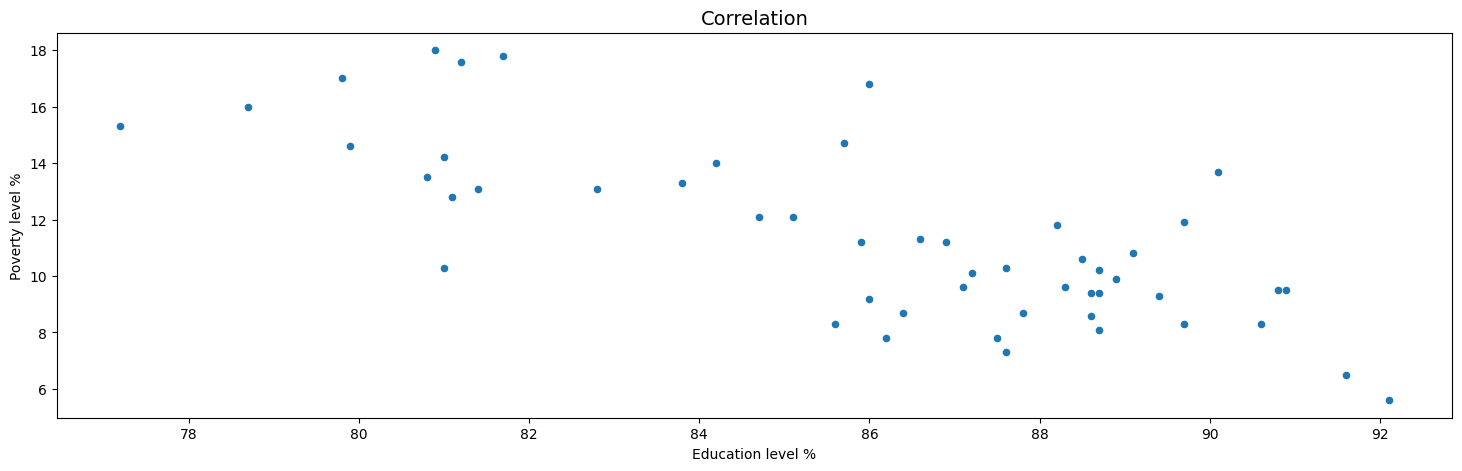

In [3]:
plot = df.plot(x='hs_grad', y='poverty', kind='scatter', figsize=(18,5))
plt.title('Correlation', fontsize=14)
plt.xlabel("Education level %")
plt.ylabel("Poverty level %")
plt.show()

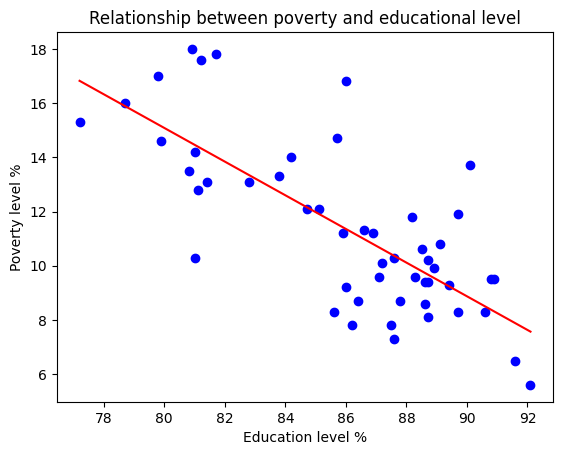

LinregressResult(slope=-0.6212167177940106, intercept=64.78096577010209, rvalue=-0.7468582531582505, pvalue=3.10882981031841e-10, stderr=0.0790164710017928, intercept_stderr=6.802595178281202)

In [4]:
import scipy.stats as stats

x=df["hs_grad"]
y=df["poverty"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob') # Set points
plt.plot(x1,y1,'-r') # Draw line

plt.title("Relationship between poverty and educational level")
plt.xlabel("Education level %")
plt.ylabel("Poverty level %")

plt.show()
stats.linregress (x, y)

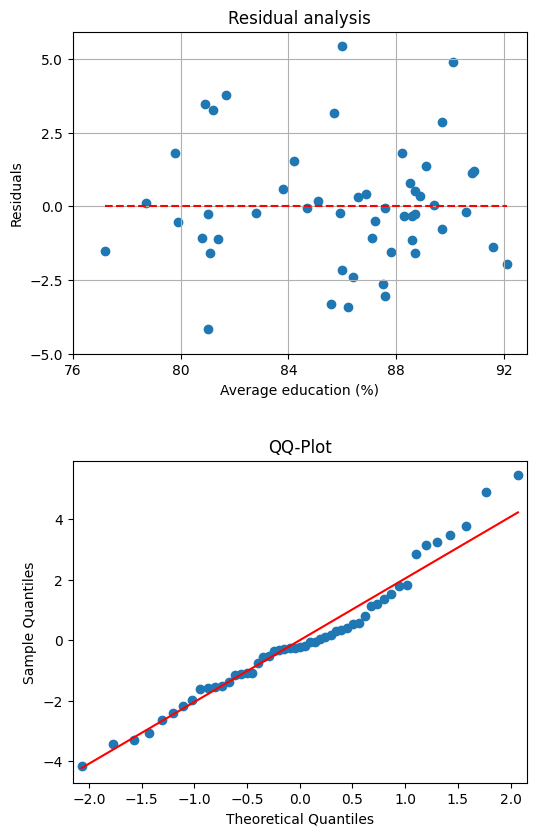

In [5]:
import statsmodels.formula.api as sm
import statsmodels.api as sma

# Obtain the data and calculate the coefficients of the regression model
intercept, slope = sm.ols(formula="poverty ~ hs_grad", data=df).fit().params
X = df['hs_grad']
Y = df['poverty']

# Calculate the residuals - how far Y is from the theoretical model
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# Create plots
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# Scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Residual analysis')
ax1.set_xlabel('Average education (%)')
ax1.set_ylabel('Residuals')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()

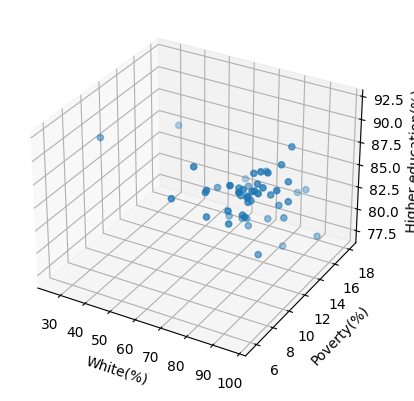

In [6]:
data_crop = df[['white', 'hs_grad', 'poverty']]
data_crop.head()
white, hs_grad, poverty = [column for column in data_crop.values.T]

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=white, ys=poverty, zs=hs_grad)

ax.set_xlabel('White(%)')
ax.set_ylabel('Poverty(%)')
ax.set_zlabel('Higher education(%)')

plt.show()